<a href="https://colab.research.google.com/github/ZhijiaoGao/Programming-Course/blob/main/R_week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


# Load required packages
library(dplyr)
library(readr)
#library(scale)

# Load the nutrient data
# Load in our choice and demographic data

data=read.csv("https://raw.githubusercontent.com/CaitlinLloyd/Psychology_Programming2025/refs/heads/main/Data/demo.csv")
choices=read.csv("https://raw.githubusercontent.com/CaitlinLloyd/Psychology_Programming2025/refs/heads/main/Data/FCT_df.csv")



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
head <-  data %>% head()
head









,X,ID,Age,Patient,Medication,BMI,Fat..g.,Calories,Protein..g.,Sugar..g.,EDE.Score,Duration.of.Illness
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,0,1,56,Yes,Yes,17.9,6,365,4,25,4.9,1.9
2,1,2,46,Yes,Yes,18.6,9,306,12,15,5.3,1.5
3,2,3,32,No,Yes,22.3,24,635,36,20,0.6,NA
4,3,4,60,No,No,22.9,32,456,27,21,0.5,NA
5,4,5,25,Yes,No,15.7,11,332,16,17,4.1,9.6
6,5,6,38,Yes,No,17.2,12,318,9,14,3.5,8.6


In [ ]:
choices


X,ID,block,trial_number,food,reaction_time,rating,fat,sugar
<int>,<int>,<chr>,<int>,<chr>,<dbl>,<dbl>,<chr>,<chr>
0,1,health,1,apple,2.68,7,high,low
1,1,health,2,beef,2.05,4,high,high
2,1,health,3,eggs,NA,NA,low,low
3,1,health,4,cookie,0.86,4,high,high
4,1,health,5,bacon,1.51,8,low,high
5,1,health,6,donut,3.15,8,high,high
6,1,health,7,broccoli,2.09,8,low,high
7,1,health,8,kale,2.47,5,low,high
8,1,health,9,fries,1.46,9,low,high


In [ ]:
# Group by participant ID, block, fat, and sugar; exclude rows with missing data
summary_df <- choices %>%
  filter(!is.na(rating), !is.na(reaction_time)) %>%
  group_by(ID, block, fat, sugar) %>%
  summarise(
    average_rating = mean(rating, na.rm = TRUE),
    average_reaction_time = mean(reaction_time, na.rm = TRUE),
    trial_count = n(),  # count of non-missing trials
    .groups = 'drop'
  )

# View the result
head(summary_df)

ID,block,fat,sugar,average_rating,average_reaction_time,trial_count
<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>
1,choice,high,high,5.333333,1.997333,15
1,choice,high,low,6.055556,2.148889,18
1,choice,low,high,5.576923,2.175769,26
1,choice,low,low,5.312500,2.511875,16
1,health,high,high,4.888889,1.976667,18
1,health,high,low,6.411765,1.978235,17


In [ ]:
summary_df$fat <- ifelse(summary_df$fat=="high","hf","lf")

summary_df$sugar <- ifelse(summary_df$sugar=="high","hs","ls")

In [ ]:
# Step 3: Pivot wider on combinations of fat/sugar/kcal levels
library(tidyr)
df_wide <- summary_df %>%
  pivot_wider(
    names_from = c(fat,sugar),
    values_from = c(average_rating, average_reaction_time, trial_count)
  )

# Try again but labeling the food types so you can more clearly see what the column names align with


In [ ]:
df_wide

ID,block,average_rating_hf_hs,average_rating_hf_ls,average_rating_lf_hs,average_rating_lf_ls,average_reaction_time_hf_hs,average_reaction_time_hf_ls,average_reaction_time_lf_hs,average_reaction_time_lf_ls,trial_count_hf_hs,trial_count_hf_ls,trial_count_lf_hs,trial_count_lf_ls
<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
1,choice,5.333333,6.055556,5.576923,5.312500,1.997333,2.148889,2.175769,2.511875,15,18,26,16
1,health,4.888889,6.411765,5.913043,5.066667,1.976667,1.978235,1.944348,2.838667,18,17,23,15
1,taste,5.466667,5.066667,5.600000,5.600000,2.131333,2.360667,2.097000,2.208000,15,15,20,25
2,choice,4.714286,6.352941,4.800000,5.050000,2.185714,2.618824,2.439000,2.123000,14,17,20,20
2,health,5.315789,4.125000,5.913043,4.875000,2.256316,2.758750,2.086522,2.295833,19,8,23,24
2,taste,5.388889,5.571429,6.050000,5.954545,2.171111,2.287143,2.273500,2.128182,18,14,20,22
3,choice,5.421053,5.000000,6.050000,5.916667,2.214737,2.498182,2.476500,2.435417,19,11,20,24
3,health,4.222222,6.684211,6.200000,5.600000,1.810000,2.247368,2.176000,2.136400,9,19,20,25
3,taste,5.500000,4.863636,5.789474,4.833333,2.181875,2.464545,2.211579,2.096667,16,22,19,18


In [ ]:
# now select some columns from the demographic frame and merge with our wide_df
demo_sub=data[,c('ID','Patient','BMI','EDE.Score','Age')]

demo_sub=merge(demo_sub,df_wide,by='ID')

In [ ]:
demo_sub <- data  %>% select('ID','Patient','BMI','EDE.Score','Age')

ID,Patient,BMI,EDE.Score,Age
<int>,<chr>,<dbl>,<dbl>,<int>
1,Yes,17.9,4.9,56
2,Yes,18.6,5.3,46
3,No,22.3,0.6,32
4,No,22.9,0.5,60
5,Yes,15.7,4.1,25
6,Yes,17.2,3.5,38
7,Yes,18.7,4.6,56
8,Yes,17.2,4.2,36
9,No,22.0,1.7,40


In [ ]:
## now let's group by patient group and calculate means of food ratings, BMI, age, EDEQ

demo_sub %>% group_by(Patient) %>% summarize_at(c("BMI","Age"),mean)


[]
c()


Patient,BMI,Age
<chr>,<dbl>,<dbl>
No,23.51053,39.47368
Yes,17.30476,43.85714


In [ ]:
library(purrr)
library(broom)

# List of variables to test
vars_to_test <- c("BMI")

# Split groups
patients <- demo_sub %>% filter(Patient == "Yes")
controls <- demo_sub %>% filter(Patient == "No")

# Function to run Welch t-test on a variable
run_t_test <- function(var) {
  test_result <- t.test(patients[[var]], controls[[var]], var.equal = FALSE)
  tibble(
    variable = var,
    mean_patient = mean(patients[[var]], na.rm = TRUE),
    mean_control = mean(controls[[var]], na.rm = TRUE),
    t_stat = test_result$statistic,
    p_value = test_result$p.value
  )
}

# Apply to each variable
ttest_results <- map_dfr(vars_to_test, run_t_test)

# View results
print(ttest_results)


In [ ]:
# Now lets plot the variables
library(ggplot2)

ggplot(demo_sub, aes(x = BMI, y = trial_count_high_high)) +
  geom_point(size = 3, alpha = 0.8) +
  geom_smooth(method = "lm", se = TRUE, color = "steelblue", size = 1) +
  labs(
    title = "BMI vs. Average High-Fat Food Rating",
    x = "Body Mass Index (BMI)",
    y = "High-Fat Food Rating (1–10)"
  ) +
  theme_minimal(base_size = 14) +
  theme(
    plot.title = element_text(face = "bold", hjust = 0.5)
  ) +

  geom_hline(yintercept = mean(demo_sub$trial_count_high_high, na.rm = TRUE),
             linetype = "dashed", color = "gray")

In [ ]:
# Here change the plot labels


library(ggplot2)

ggplot(demo_sub, aes(x = BMI, y = trial_count_high_high,color=Patient, group=Patient)) +
  geom_point(size = 3, alpha = 0.8) +
  geom_smooth(method = "lm", se = TRUE, color = "steelblue", size = 1) +
  labs(
    title = "BMI vs. Average High-Fat Food Rating",
    x = "Body Mass Index (BMI)",
    y = "High-Fat Food Rating (1–10)"
  ) +
  theme_minimal(base_size = 14) +
  theme(
    plot.title = element_text(face = "bold", hjust = 0.5)
  ) +

  geom_hline(yintercept = mean(demo_sub$trial_count_high_high, na.rm = TRUE),
             linetype = "dashed", color = "gray")


In [ ]:
# Look at a different outcome

In [ ]:
# Advanced
# Try and plot, in the patient group only BMI against choice preference for high vs low fat

# Let's also look at age


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rdpack’, ‘doBy’, ‘MatrixModels’, ‘reformulas’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘car’, ‘cowplot’, ‘rstatix’




ERROR: Error: object 'demo_sub' not found


In [ ]:

# Now we will compare patient and HC using regression
lm(BMI ~ Patient, demo_sub)


In [ ]:
# Variables to test
variables <- c("BMI")

# Now create a loop to run through a regression model for each variable

# View results
print(results)



In [ ]:
#Amend the formula above to ask about interactions between patient group and fat content influence on choice rating

# Now try to group the demo df by patient status and correlate fat intake at meal and age

data %>%
  group_by(Patient) %>%
  summarise(corr = cor(Fat..g., Age, use = "complete.obs"))




In [ ]:
#Homework
## Load in the delay discounting data: ("https://raw.githubusercontent.com/CaitlinLloyd/Psychology_Programming2025/refs/heads/main/Data/DD_df.csv")

## Calculate the average number of delayed choices in patient and HC groups
## Calculate the correlation between age, delayed choices and impulsivity scale per group
## Plot delayed choices and impulsivity by patient group

In [18]:
data = read.csv("https://raw.githubusercontent.com/CaitlinLloyd/Psychology_Programming2025/refs/heads/main/Data/DD_df.csv")


In [17]:
## Calculate the average number of delayed choices in patient and HC groups
library(dplyr)

#delayed choices per participant
participant_summary <- data %>%
  group_by(participant_id, group) %>%
  summarise(
    age = first(age),
    impulsivity = first(impulsivity),
    delayed_total = sum(chose_delayed),
    n_trials = n(),
    .groups = "drop"
  )



#Average number of delayed choices per group
avg_delayed <- participant_summary %>%
  group_by(group) %>%
  summarise(mean_delayed = mean(delayed_total, na.rm = TRUE))
print(avg_delayed)

# A tibble: 2 × 2
  group   mean_delayed
  <chr>          <dbl>
1 SUD             45.7
2 control         60.6


In [20]:
## Calculate the correlation between age, delayed choices and impulsivity scale per group
corr <- participant_summary %>%
  group_by(group) %>%
  summarise(
    cor_age_delayed = cor(age, delayed_total, use = "complete.obs"),
    cor_age_impulsivity = cor(age, impulsivity, use = "complete.obs"),
    cor_delayed_impulsivity = cor(delayed_total, impulsivity, use = "complete.obs")
  )
print(corr)

# A tibble: 2 × 4
  group   cor_age_delayed cor_age_impulsivity cor_delayed_impulsivity
  <chr>             <dbl>               <dbl>                   <dbl>
1 SUD              0.0218              0.0412                  -0.885
2 control          0.0527              0.0197                  -0.815


`geom_smooth()` using formula = 'y ~ x'


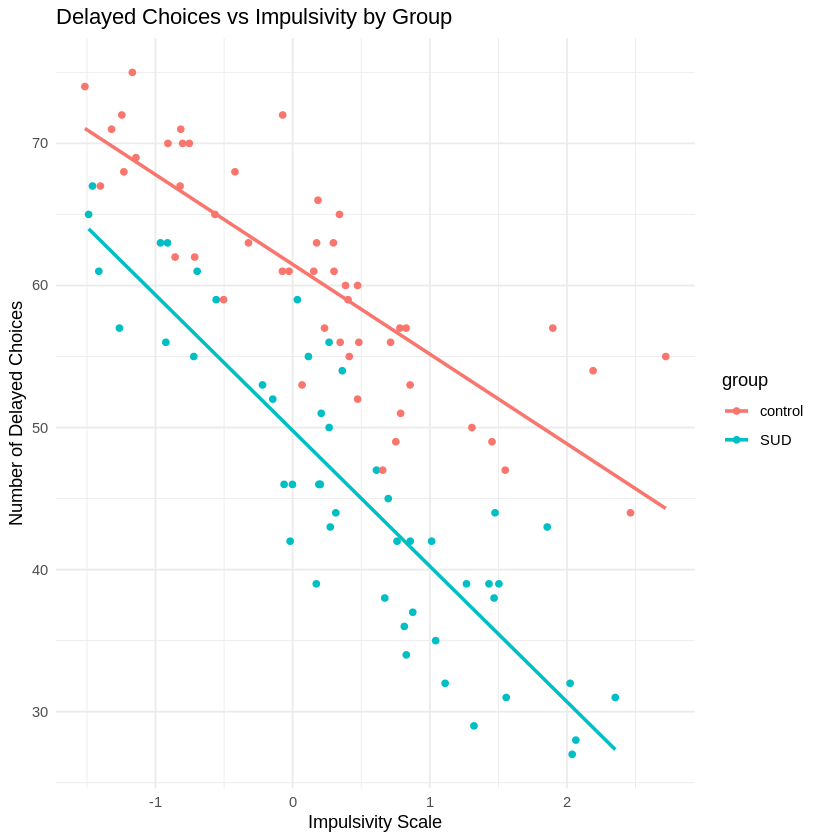

In [24]:
library(ggplot2)
## Plot delayed choices and impulsivity by patient group
ggplot(participant_summary, aes(x = impulsivity, y = delayed_total, color = group)) + geom_point() + geom_smooth(method = "lm", se = FALSE) + labs(title = "Delayed Choices vs Impulsivity by Group",
    x = "Impulsivity Scale",
    y = "Number of Delayed Choices") + theme_minimal()